# 1.Free parameter inference

## Google drive mount 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [5]:
ls

 고전역학/
'데이터사이언스 스쿨 개인공부'/
'04.07 피봇테이블과 그룹분석.ipynb'
'0. Corona Virus Dataset'/
'100. 데이터경진대회 분석 시작.ipynb'
'1. Backup Files'/
'1 머신러닝(Machine Learning) 개념.ipynb'
'2020빅콘테스트 문제데이터(혁신아이디어분야)'/
'2. Classroom : 빅데이터 인공지능'/
'4. (연구) Peak Detection & Curve-Fitting'/
'5peak 3 para when it worksss.ipynb'
'Colab Notebooks'/
'Copy of Hyoungsun Park - _네이버 블로그 스크래핑.ipynb'
'연구 최종코드 진행중.ipynb'
'코로나 바이러스 데이터 분석.ipynb'
'Project : 빅데이터 인공지능 '/
 XPS/


In [6]:
cd XPS

/content/gdrive/My Drive/XPS


In [7]:
ls

ITO_O1s_bg.txt        ITO_O1s_p1.txt  P3HT_S2p_bg.txt        P3HT_S2p_p1.txt
ITO_O1s_exp.txt       ITO_O1s_p2.txt  P3HT_S2p_exp.txt       P3HT_S2p_p2.txt
ITO_O1s_fitting.txt   ITO_O1s_p3.txt  P3HT_S2p_fitting.txt
ITO_O1s_numerics.txt  model.png       P3HT_S2p_numerics.txt


## P3HT_S2p Data Visualization

### Data load and plotting

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

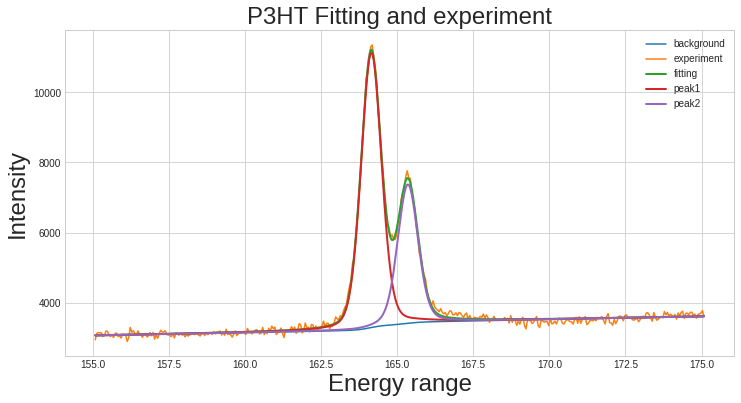

In [9]:
plt.figure(figsize = (12, 6))

plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

### P3HT-Peak1

In [10]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 164.15
    x1 = 165.35
    w = 0.787
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[ 5.20738135e-01 -7.04228746e-03  1.10098061e+04]


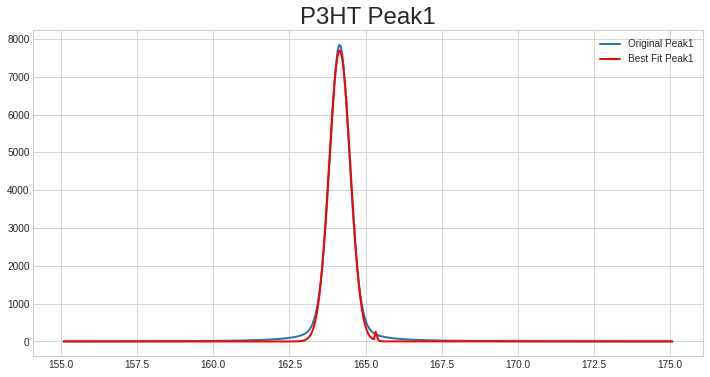

In [11]:
from scipy.optimize import curve_fit

initial_guess = [1.1, 0.587, 8000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("P3HT Peak1", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### P3HT-Peak2

In [12]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 165.36
    x1 = 165.35
    w = 0.786
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.10542152e-01 4.39291704e-01 4.01018290e+03]


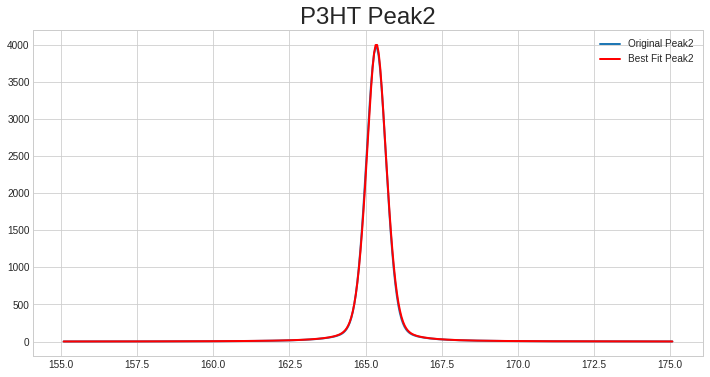

In [13]:
initial_guess = [4.1, 0.787, 3500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:, 0], voigt(peak2[:, 0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)
plt.title("P3HT Peak2", size = 24)
plt.legend()
plt.grid(True)
plt.show();

## ITO_01s Data Visualizaton

### Data load and plotting

In [14]:
# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

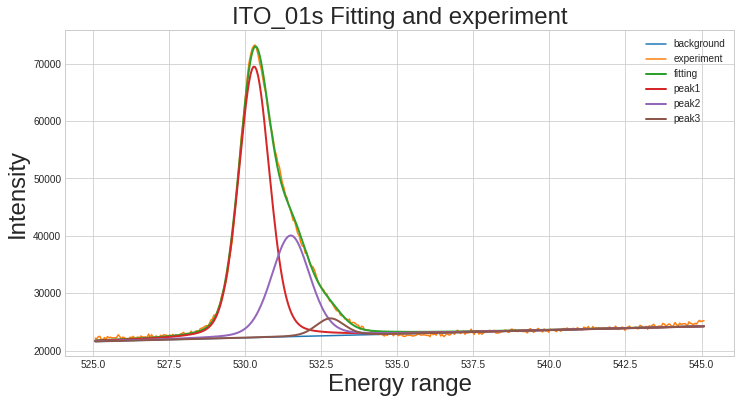

In [15]:
# Plotting data
plt.figure(figsize = (12, 6))
plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], peak3[:, 1], label = "peak3", linewidth = 2)

plt.grid(True)
plt.title("ITO_01s Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [16]:

#print(bg[:, 0] == exp[:, 0])
#print(bg[:, 0] == fitting[:, 0])
print(bg[:, 0] == peak1[:, 0])
#print(peak2[:, 0])
#print(peak3[:, 0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

### ITO-Peak1

In [17]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))

def voigt(x, beta, gamma, amp):
    x0 = 530.3
    x1 = 530.35
    w = 1.199
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.06094657e-01 4.50679139e-01 4.76922479e+04]


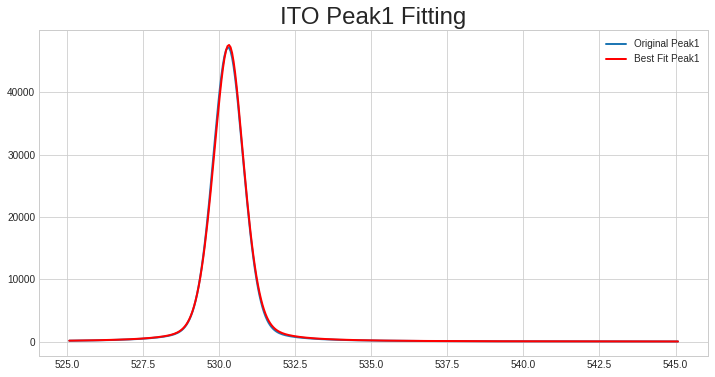

In [18]:
initial_guess = [1.2, 0.2, 45000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("ITO Peak1 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak2

In [19]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 531.5
    x1 = 531.7
    w = 1.483
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[4.82032239e-01 5.09968356e-01 1.78613331e+04]


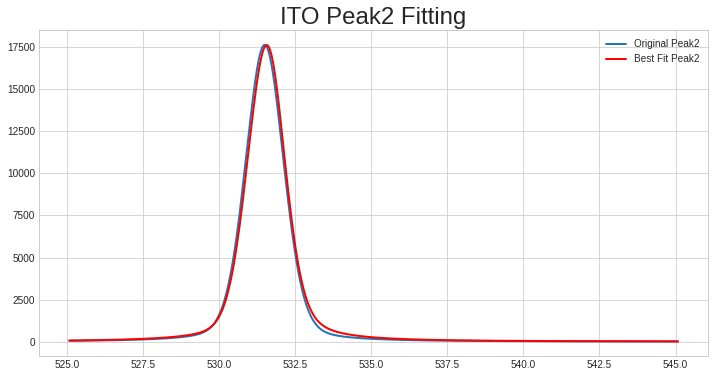

In [20]:
initial_guess = [0.2, 1.2, 17500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:,0], voigt(peak2[:,0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)

plt.title("ITO Peak2 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak3

In [21]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 532.8
    x1 = 532.7
    w = 1.095
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[4.94463613e-01 4.79866267e-01 3.04073694e+03]


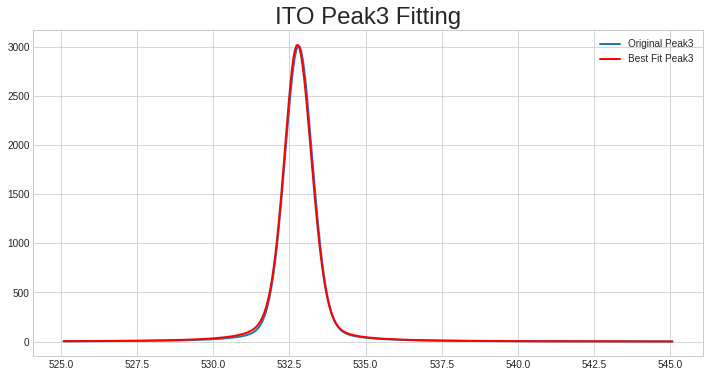

In [22]:
initial_guess = [0.2, 1.2, 3500 ] 
popt, pcov = curve_fit(voigt, peak3[:,0], peak3[:,1] - bg[:, 1], p0 = initial_guess)
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak3[:, 0], peak3[:, 1] - bg[:, 1], label = "Original Peak3", linewidth=2)
plt.plot(peak3[:,0], voigt(peak3[:,0], *popt), label = "Best Fit Peak3", color='red', linewidth=2)

plt.title("ITO Peak3 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

# 2.Machine Learning Start!

## Data Generation

In [23]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect

# ========== Parameter Matrix generation ==========
N = 5  # Maximum number of the possible peak
Data_size = 600000

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(600000, 5, 3)


In [24]:
# Now we use the new model funtion : 
# voigt function = linear combination of Gaussian and Lorentzian function with some ratio 0.3

def voigt(x, *args, beta = 4.94463613e-01, gamma=4.79866267e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

    return result 
    

In [25]:
# ========== x-domain range ==========
x = np.arange(0, 10, 0.01) # 나중에는 이 부분을 test xps 데이터의 x-domain으로 맞춰야 함!
print(len(x))

1000


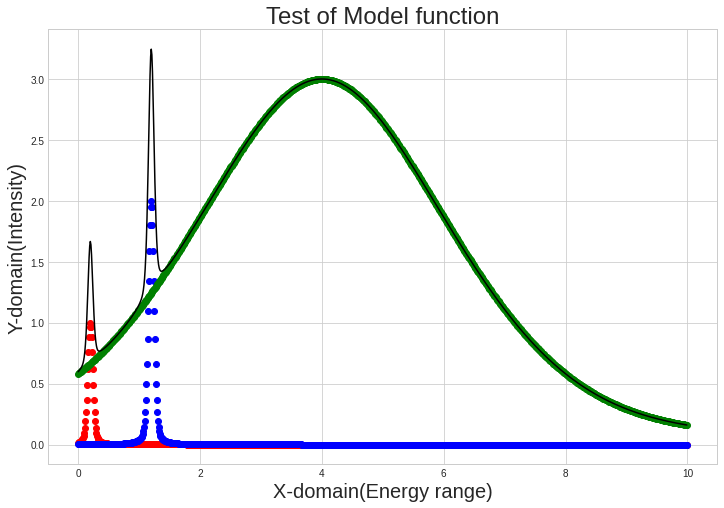

In [26]:
# ========== Checking out of the voigt function ==========
params = [1, 0.2, 0.1, 2, 1.2, 0.11, 3, 4, 5]

plt.figure(figsize = (12, 8))
plt.plot(x, voigt(x, *params), color = 'black')

plt.scatter(x, voigt(x, *params[:3]), color = 'red')
plt.scatter(x, voigt(x, *params[3:6]), color = 'blue')
plt.scatter(x, voigt(x, *params[6:]), color = 'green')

plt.title("Test of Model function", size = 24)
plt.xlabel("X-domain(Energy range)", size = 20)
plt.ylabel("Y-domain(Intensity)", size = 20)
plt.grid(True)
plt.show()

In [27]:
# ========== Generation of Voigt function Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Voigt function
        # amplitude : 1 ~ 5 
        # center    : 0 ~ 10
        # width     : 2 ~ 0.5 

        center1 = 1 + 0.5*np.random.rand() - 0.25
        center2 = 3 + 0.5*np.random.rand() - 0.25
        center3 = 5 + 0.5*np.random.rand() - 0.25
        center4 = 7 + 0.5*np.random.rand() - 0.25
        center5 = 9 + 0.5*np.random.rand() - 0.25
        
        #                                       amplitude      center        width
        Parameters[i][0] = np.array([[1 + 4* np.random.rand(), center1, 3*np.random.rand() ]])
        Parameters[i][1] = np.array([[1 + 4* np.random.rand(), center2, 3*np.random.rand() ]])
        Parameters[i][2] = np.array([[1 + 4* np.random.rand(), center3, 3*np.random.rand() ]])
        Parameters[i][3] = np.array([[1 + 4* np.random.rand(), center4, 3*np.random.rand() ]])
        Parameters[i][4] = np.array([[1 + 4* np.random.rand(), center5, 3*np.random.rand() ]])

        
# Check out
print(Parameters)  

[[[2.30772254 0.88754309 2.52271272]
  [1.50847372 2.8015776  1.99146349]
  [4.54023631 5.12508761 1.68211921]
  [4.18211832 7.07307267 0.67630149]
  [3.68421854 9.2066735  2.19990751]]

 [[2.96333578 0.89342467 2.55278621]
  [3.17941272 2.86437111 0.40422841]
  [4.87798859 5.1199526  1.49960406]
  [1.21352893 7.02245391 0.12973749]
  [2.12784296 9.20268706 1.73298841]]

 [[4.22376082 0.88485993 2.65767593]
  [2.20261288 2.83918656 1.68693547]
  [3.37184745 5.08888774 0.05758407]
  [4.89175421 7.09736231 2.89499374]
  [2.19163895 9.2368962  0.58141873]]

 ...

 [[2.1304216  1.22928325 1.7423187 ]
  [4.38214484 3.00175915 0.73377441]
  [1.4355591  4.79284354 2.15035115]
  [4.18013571 6.78684203 2.79847333]
  [1.61367932 8.96438987 2.94750826]]

 [[2.80945777 0.77514603 0.32425343]
  [2.60670016 2.89733277 2.99954796]
  [4.6504778  4.78582347 1.29612417]
  [2.14615086 6.89421321 0.75765082]
  [4.636908   8.98983933 2.50316746]]

 [[2.17478143 1.20381356 1.75437023]
  [4.23955848 2.771925

In [28]:
# ========== Data Generation ==========

GRAPH = []     # y-value of the Voigt function
AREA = []      # Area of the Voigt funtion
NUM_PEAK = []  # Number of peak
AMPLITUDE = [] # Amplitude
CENTER = []    # Center
WIDTH = []     # Width

for j in Parameters:

    peak = random.randint(1, N)  # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshaping to put it as *args

    # Appending to list
    GRAPH.append(voigt(x, *j[0:3*peak]))
    AREA.append(sum(voigt(x, *j[0:3*peak])))
    NUM_PEAK.append(peak)
    AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
    CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
    WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))
    

In [29]:
# ========== Conversion to Numpy.array ==========
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)
AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# ========== Checking out the shape ==========
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)
print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(600000, 1000)
(600000,)
(600000,)
(600000, 5)
(600000, 5)
(600000, 5)


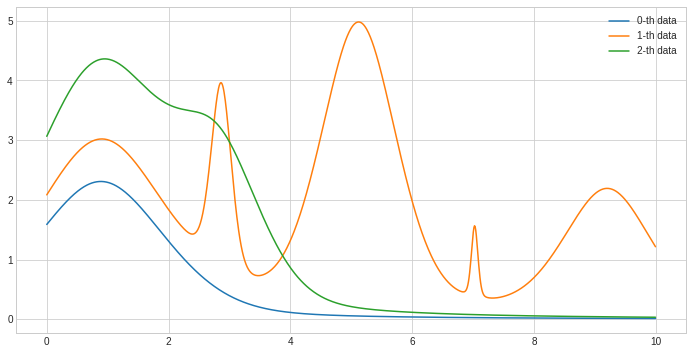

In [30]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))
for i in range(3):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)

In [31]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:500000])
val_graph   = np.array(GRAPH[500000:550000])
test_graph  = np.array(GRAPH[550000:])

# area label
train_area = np.array(AREA[:500000])
val_area   = np.array(AREA[500000:550000])
test_area  = np.array(AREA[550000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:500000])
val_num_peak   = np.array(NUM_PEAK[500000:550000])
test_num_peak  = np.array(NUM_PEAK[550000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:500000])
val_amp   = np.array(AMPLITUDE[500000:550000])
test_amp  = np.array(AMPLITUDE[550000:])

# center label
train_center = np.array(CENTER[:500000])
val_center   = np.array(CENTER[500000:550000])
test_center  = np.array(CENTER[550000:])

# width label
train_width = np.array(WIDTH[:500000])
val_width   = np.array(WIDTH[500000:550000])
test_width  = np.array(WIDTH[550000:])

In [32]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(500000, 1000) (500000,) (500000,) (500000, 5) (500000, 5) (500000, 5)
(50000, 1000) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)
(50000, 1000) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)


In [34]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(500000, len(x), 1)
val_graph   = val_graph.reshape(50000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(500000, 1000, 1)
(50000, 1000, 1)
(50000, 1000, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 901, 64)      6464        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, 450, 64)      0           conv1d_3[0][0]                   
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 450, 64)      256         max_pooling1d_3[0][0]            
_______________________________________________________________________________________

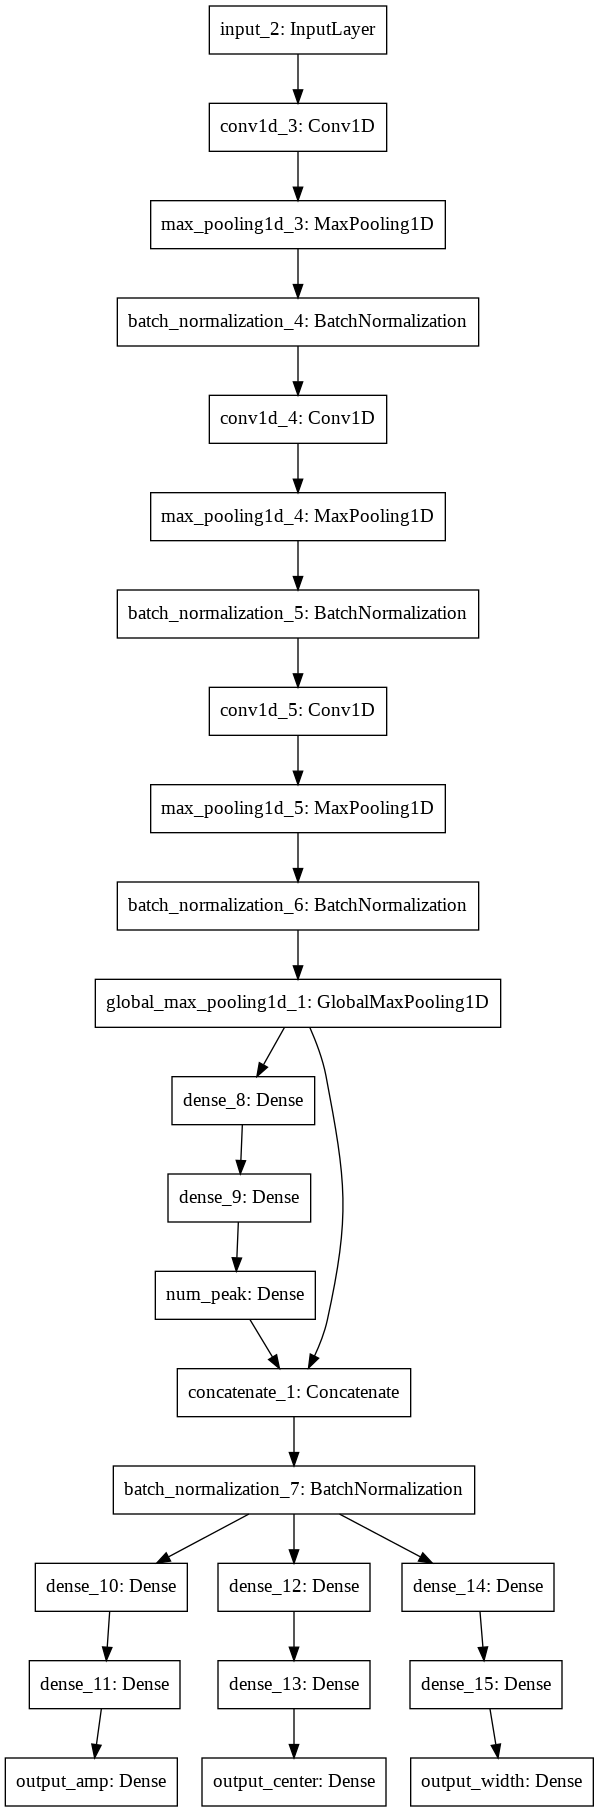

In [36]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(64, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)
x_batch1 = BatchNormalization()(x_pooling1)

x_conv2 = Conv1D(32, kernel_size = 50, activation = 'relu')(x_batch1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)
x_batch2 = BatchNormalization()(x_pooling2)

x_conv3 = Conv1D(32, kernel_size = 25, activation = 'relu')(x_batch2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)
x_batch3 = BatchNormalization()(x_pooling3)

x_GMpooling = GlobalMaxPooling1D()(x_batch3)

# output : area
#hidden_area1 = Dense(50, activation = 'relu')(x_GMpooling)
#hidden_area2 = Dense(50, activation = 'relu')(hidden_area1)
#output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)

# output : number of peak
hidden_num_peak1 = Dense(50, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(50, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)


# merging features into one layer
merge = concatenate([output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)

# prediction output
hidden_amp1 = Dense(200, activation = 'relu')(merge2)
hidden_amp2 = Dense(100, activation = 'relu')(hidden_amp1)
output_amp = Dense(5, activation = 'linear', name = 'output_amp')(hidden_amp2)

hidden_center1 = Dense(200, activation = 'relu')(merge2)
hidden_center2 = Dense(100, activation = 'relu')(hidden_center1)
output_center = Dense(5, activation = 'linear', name = 'output_center')(hidden_center2)

hidden_width1 = Dense(200, activation = 'relu')(merge2)
hidden_width2 = Dense(100, activation = 'relu')(hidden_width1)
output_width = Dense(5, activation = 'linear', name = 'output_width')(hidden_width2)



# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_num_peak,
                         output_amp, output_center, output_width])

# Summarize layers
print(model.summary())

# plot graph
plot_model(model)

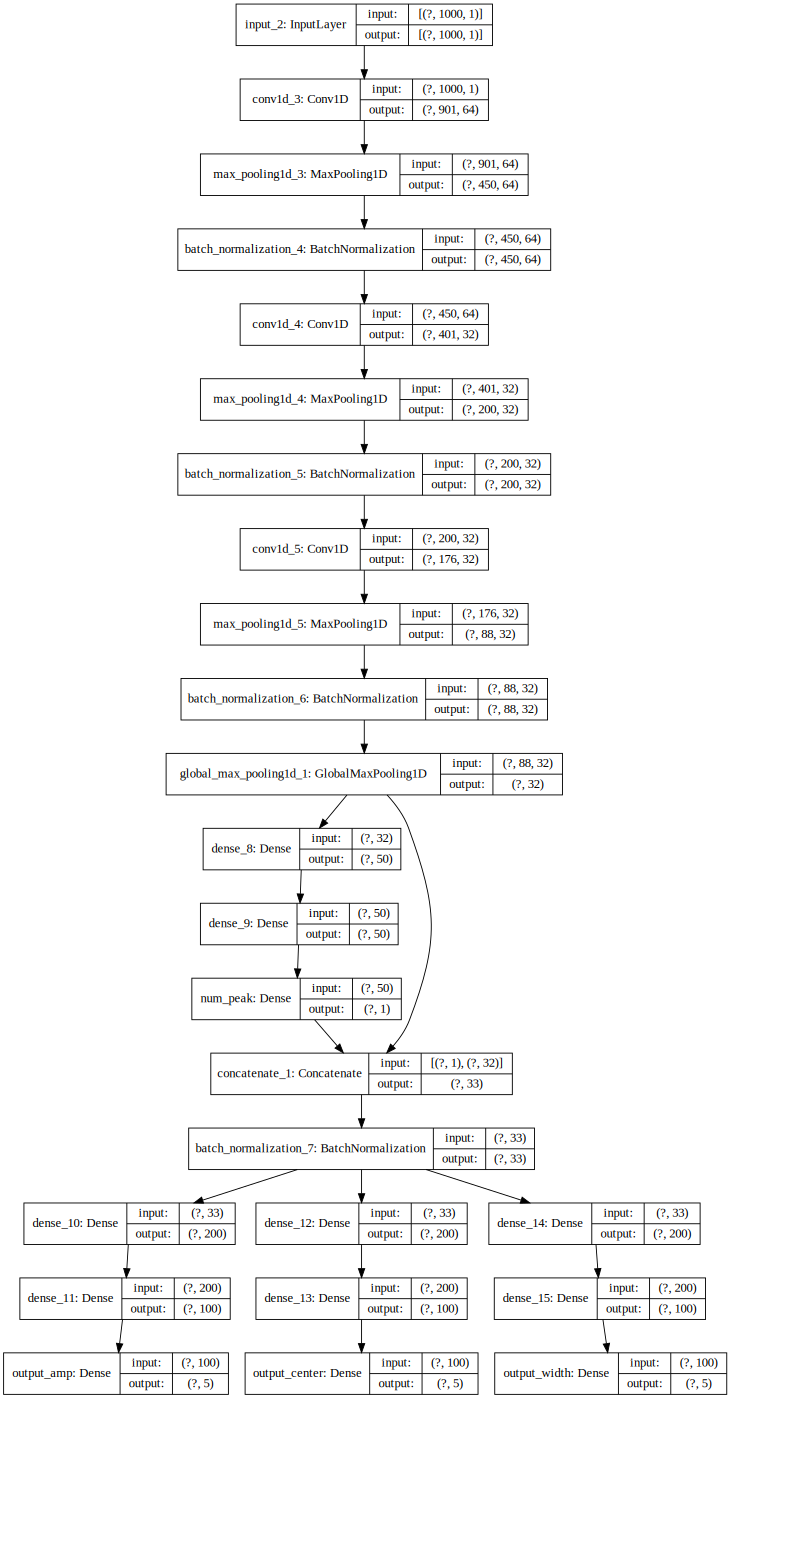

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [38]:
model.compile(loss = ['mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [ ]:
%%time
hist = model.fit(train_graph, [train_num_peak, train_amp, train_center, train_width],
                 epochs = 50,
                 batch_size = 2500,
                 validation_data = (val_graph, 
                                    [val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



In [ ]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Area Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



In [ ]:
print(test_graph.shape)

In [ ]:
prediction = model.predict(test_graph)
print(len(prediction))

In [ ]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape) # width

In [ ]:
for i in range(30):
    
    test_amp[i] = np.array(test_amp[i])
    test_center[i] = np.array(test_center[i])
    test_width[i] = np.array(test_width[i])
    
    test_params = np.stack((test_amp[i], test_center[i], test_width[i]))
    test_params = test_params.T.reshape(15)
    test_params = list(test_params)
    
    #########################################################
    prediction[2][i] = np.array(prediction[2][i])
    prediction[3][i] = np.array(prediction[3][i])
    prediction[4][i] = np.array(prediction[4][i])
    
    predict_params = np.stack((prediction[2][i], prediction[3][i], prediction[4][i]))
    predict_params = predict_params.T.reshape(15)
    predict_params = list(predict_params)
    
    ########################################################
    print('======================================================================')
    plt.figure(figsize = (12, 6))
    plt.plot(x, voigt(x, *test_params), label = 'True')
    plt.plot(x, voigt(x, *predict_params), label = 'Prediction')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print("Predicted area:", prediction[0][i])
    print("True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("True amplitude:", test_amp[i] )

    print("Predicted center:", prediction[3][i])
    print("True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("True width:", test_width[i])
    print('======================================================================')
    
    

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15, 10))
#plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1]-bg[:, 1], label = "experiment")
#plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
#plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
#plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
#plt.plot(peak3[:, 0], peak3[:, 1], label = "peak3", linewidth = 2)
plt.grid(True)
plt.title("ITO_01s Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [ ]:
peak1[:,0].shape,  